## Imports and Setup
Load core libraries for data handling, visualization, preprocessing, and classification models.

### Libraries Used:
- **pandas**
- **matplotlib**
- **scikit-learn**

In [ ]:
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Load Dataset
Read the obesity dataset from CSV and preview its shape and first few rows.

In [22]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Class Distribution (Bar Chart)
Visualize counts of each obesity category to understand class balance.


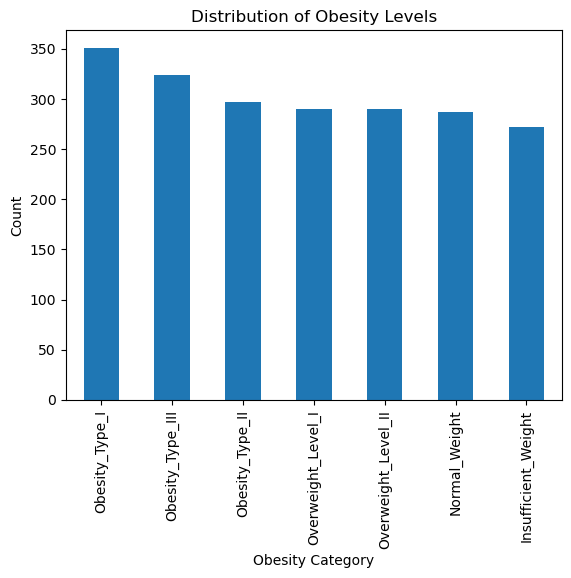

In [23]:
df["NObeyesdad"].value_counts().plot(
    kind="bar",
    title="Distribution of Obesity Levels"
)
plt.xlabel("Obesity Category")
plt.ylabel("Count")
plt.show()


## Class Distribution (Pie Chart)
Show proportion of each obesity class to complement the count plot.


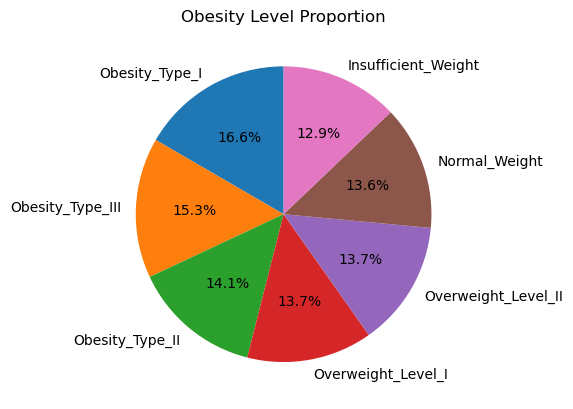

In [24]:
df["NObeyesdad"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Obesity Level Proportion")
plt.ylabel("")
plt.show()


## Encode Categorical Features
Apply label encoding to convert categorical fields into numeric values for modeling.



In [25]:
label_encoders = {}

for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


## Correlation Heatmap
Inspect correlations between encoded features and target to spot relationships and multicollinearity.


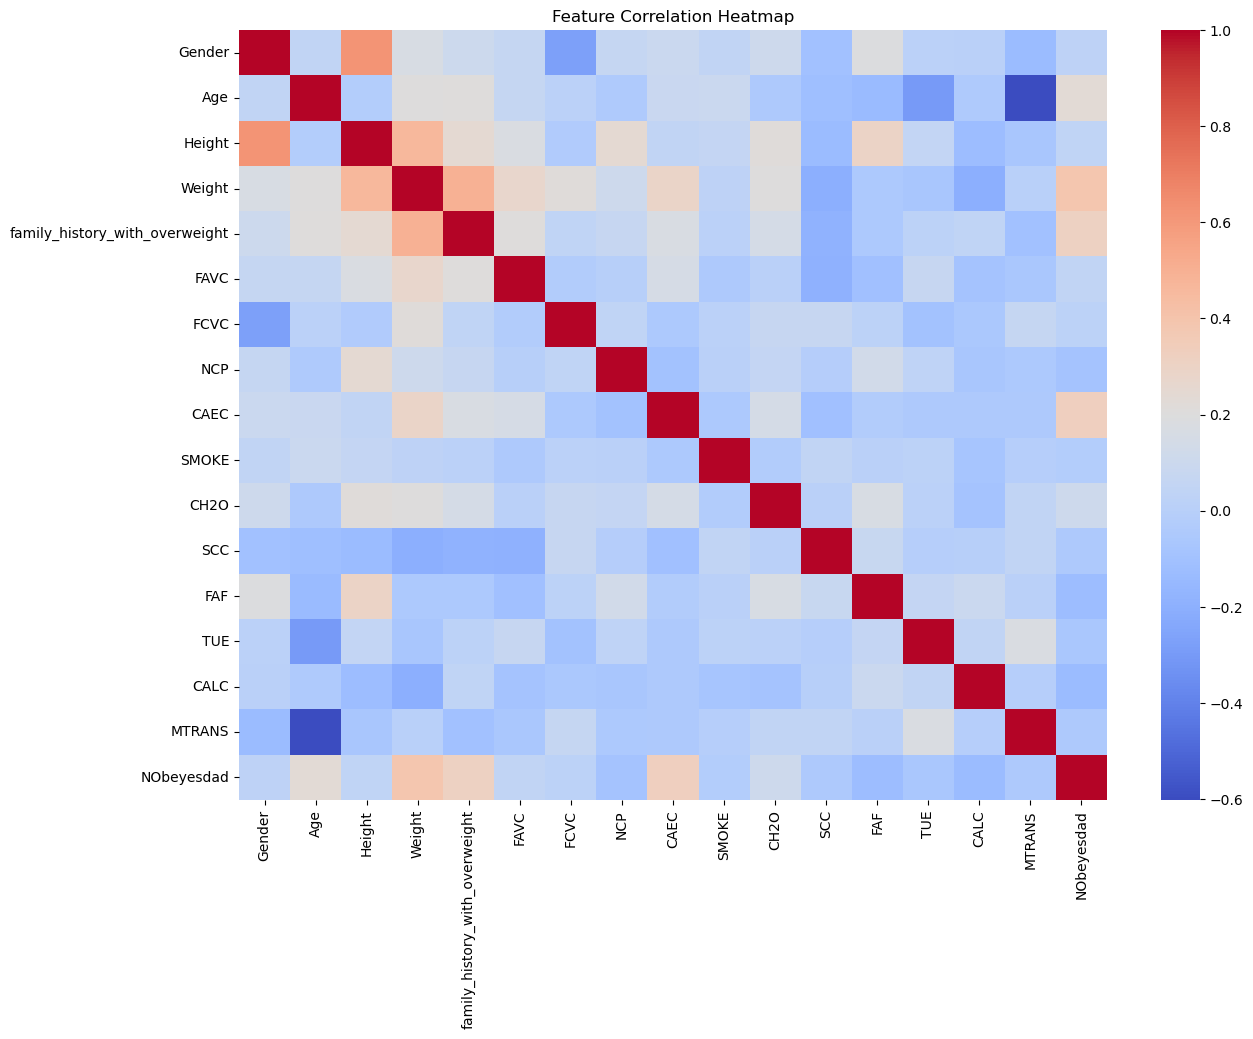

In [26]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


## Feature and Target Split
Separate predictors from the obesity target label for modeling.

In [27]:
X = df.drop("NObeyesdad", axis=1)
y = df["NObeyesdad"]


## Train/Test Split
Create stratified training and test sets to evaluate model performance fairly.


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


## Logistic Regression 
Train a scaled logistic regression classifier as a linear baseline and report accuracy.


In [29]:
log_model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))


Logistic Regression Accuracy: 0.8676122931442081


## Decision Tree
Fit an unscaled decision tree classifier and evaluate its accuracy.


In [30]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))


Decision Tree Accuracy: 0.91725768321513


## Random Forest
Train a random forest ensemble to capture nonlinear relationships and compute accuracy.


In [31]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))


Random Forest Accuracy: 0.9527186761229315


## K-Nearest Neighbors (KNN)
Scale features, train a KNN classifier, and evaluate accuracy.


In [32]:
knn_model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=5))
])

knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, knn_preds))


KNN Accuracy: 0.806146572104019


## Naive Bayes
Fit a Gaussian Naive Bayes model and record its accuracy.


In [33]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))


Naive Bayes Accuracy: 0.6028368794326241


## Confusion Matrix (Random Forest)
Plot the confusion matrix for the random forest to inspect per-class performance.

### What Is a Confusion Matrix?
A table showing **how often predictions match actual values**, broken down by class:
- **True Positives (TP)**: Correctly predicted class i
- **False Positives (FP)**: Incorrectly predicted as class i
- **False Negatives (FN)**: Should have predicted class i but didn't
- **True Negatives (TN)**: Correctly predicted as other classes

### How to Read It:
- **Diagonal elements**: Correct predictions (should be large)
- **Off-diagonal elements**: Misclassifications (should be small)
- **Row totals**: Actual class distribution
- **Column totals**: Predicted class distribution

### Interpretation Guide:
- If a class has low diagonal values → model struggles to identify that class
- High off-diagonal in a row → model confuses that class with another
- Use this to identify which classes need improvement and where confusion occurs

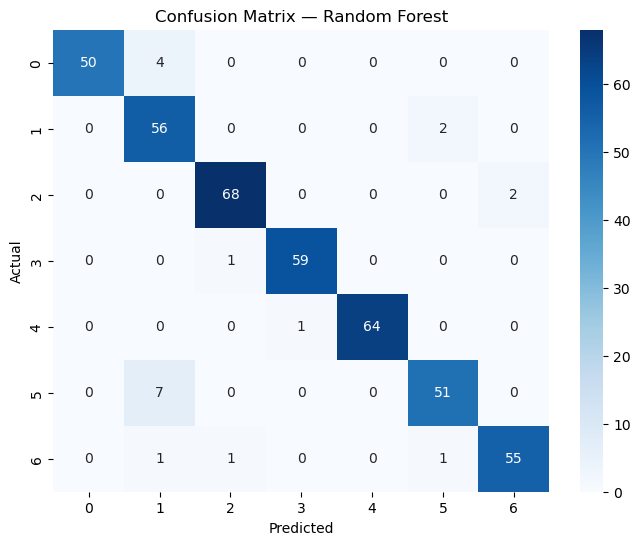

In [34]:
cm = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Classification Report (Random Forest)
Display precision, recall, and F1 scores for the random forest across classes.

### Key Metrics Explained:

**Precision** = TP / (TP + FP)
- Of all samples we predicted as class i, how many were actually class i?
- High precision = few false alarms
- Important when false positives are costly

**Recall** = TP / (TP + FN)
- Of all samples that were actually class i, how many did we correctly identify?
- High recall = didn't miss many positive cases
- Important when false negatives are costly

**F1-Score** = 2 × (Precision × Recall) / (Precision + Recall)
- Harmonic mean of precision and recall
- Balances both metrics; useful when classes are imbalanced
- Ranges from 0 to 1 (higher is better)

**Support**
- Number of true instances of each class in test set
- Shows class representation

### When to Use Each Metric:
- **Accuracy**: Only when classes are balanced
- **Precision**: When false positives are expensive (e.g., spam detection)
- **Recall**: When false negatives are expensive (e.g., disease detection)
- **F1**: When you need overall balance and classes are imbalanced

In [35]:
print(classification_report(y_test, rf_preds))


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.82      0.97      0.89        58
           2       0.97      0.97      0.97        70
           3       0.98      0.98      0.98        60
           4       1.00      0.98      0.99        65
           5       0.94      0.88      0.91        58
           6       0.96      0.95      0.96        58

    accuracy                           0.95       423
   macro avg       0.96      0.95      0.95       423
weighted avg       0.96      0.95      0.95       423



## Feature Importance
Plot the top predictive features from the random forest model.

### What Is Feature Importance?
- Measures **how much each feature contributes** to the model's predictions
- Based on how much each feature **decreases impurity** (disorder) when used in tree splits
- Higher score = feature is more useful for distinguishing between obesity levels

### How Random Forest Calculates It:
1. For each feature, track reductions in **Gini impurity** at every split across all trees
2. Aggregate these reductions across all 100 trees
3. Normalize to sum to 1 (represents relative contribution)

### Interpretation:
- **Top features** are the strongest obesity predictors in your dataset
- Can inform health interventions (e.g., if weight matters most, focus weight management)
- Helps understand which factors the model relies on
- Low-importance features may be noise or redundant

### Example Insights:
- If Weight scores 0.25, it contributes ~25% to all model splits
- Features near 0 have negligible impact and could be removed

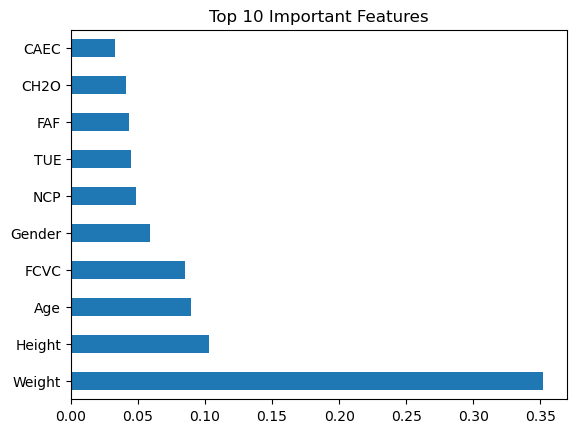

In [36]:
importances = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10).plot(kind="barh")
plt.title("Top 10 Important Features")
plt.show()


## Weight by Obesity Level
Visualize weight distributions across obesity categories using a boxplot.


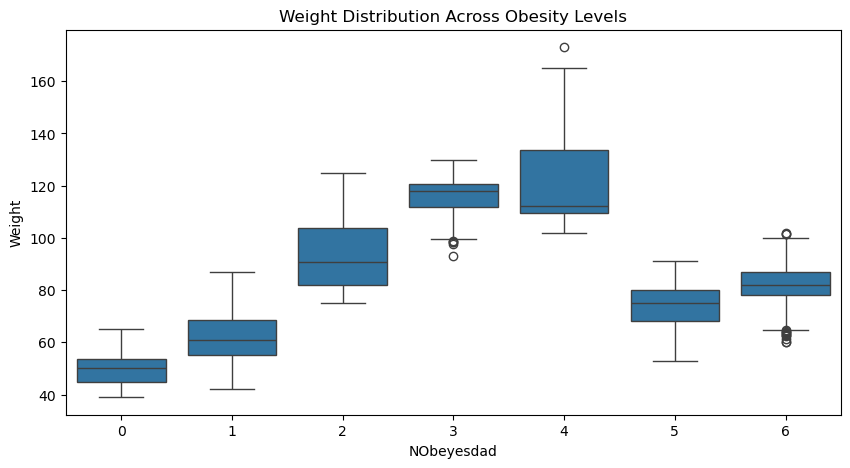

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x=y, y=df["Weight"])
plt.title("Weight Distribution Across Obesity Levels")
plt.show()


## Physical Activity vs Obesity
Use a violin plot to compare physical activity frequency across obesity categories.


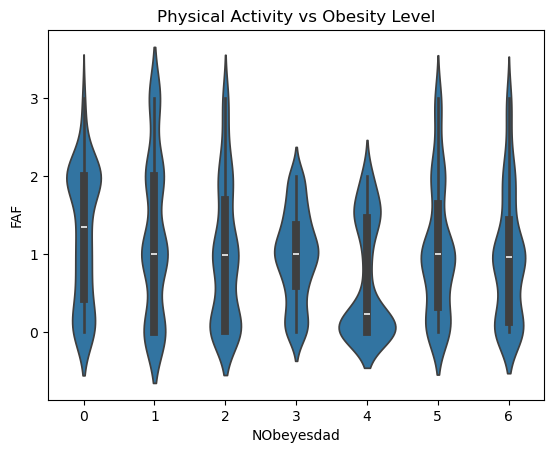

In [38]:
sns.violinplot(x=y, y=df["FAF"])
plt.title("Physical Activity vs Obesity Level")
plt.show()


## Model Accuracy Comparison
Compile accuracies from all models and visualize side-by-side.

### Why Compare Models?
- **Different algorithms have different strengths**:
  - Linear models excel with separable classes
  - Tree-based models handle non-linear patterns
  - Ensemble methods reduce overfitting
- Comparison reveals which approach works best for this obesity dataset
- Informs production model selection

### Bar Chart Interpretation:
- **Height of each bar**: Accuracy (proportion of correct predictions)
- **Rank models**: Best-performing goes to production
- **Performance gaps**: Large gaps suggest problem complexity; small gaps suggest simpler problem

### Accuracy Baseline:
- If 60% of data is obese, naive "always predict obese" = 60% accuracy
- All models should exceed this baseline
- Improvement over baseline indicates real learning

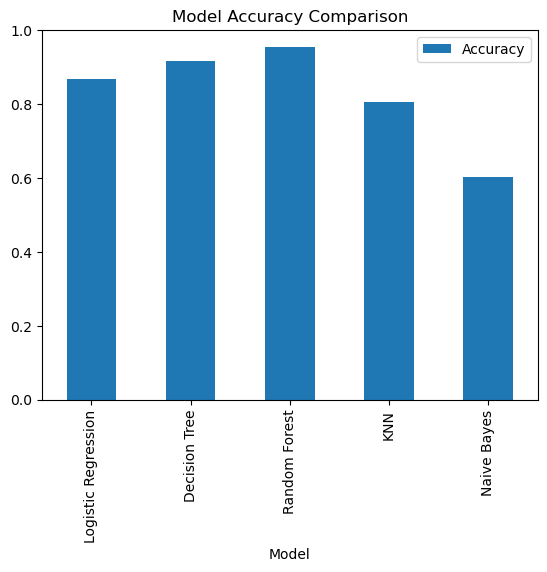

In [39]:
results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "KNN",
        "Naive Bayes"
    ],
    "Accuracy": [
        accuracy_score(y_test, log_preds),
        accuracy_score(y_test, dt_preds),
        accuracy_score(y_test, rf_preds),
        accuracy_score(y_test, knn_preds),
        accuracy_score(y_test, nb_preds)
    ]
})

results.set_index("Model").plot(kind="bar")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()


## Voting Ensemble (Soft Voting)
Combine multiple base learners with soft voting to potentially improve performance and show its report.


In [ ]:

from sklearn.ensemble import VotingClassifier

# Create Ensemble Model
ensemble_model = VotingClassifier(
    estimators=[
        ("lr", Pipeline([("scaler", StandardScaler()), ("model", LogisticRegression(max_iter=1000))])),
        ("dt", DecisionTreeClassifier(random_state=42)),
        ("rf", RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)),
        ("knn", Pipeline([("scaler", StandardScaler()), ("model", KNeighborsClassifier(n_neighbors=5))])),
        ("nb", GaussianNB())
    ],
    voting="soft"
)

ensemble_model.fit(X_train, y_train)
ensemble_preds = ensemble_model.predict(X_test)

print("Ensemble Model Accuracy:", accuracy_score(y_test, ensemble_preds))
print("\nEnsemble Classification Report:\n")
print(classification_report(y_test, ensemble_preds))


Ensemble Model Accuracy: 0.9290780141843972

Ensemble Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.81      0.90      0.85        58
           2       0.94      0.94      0.94        70
           3       0.95      0.98      0.97        60
           4       1.00      0.98      0.99        65
           5       0.86      0.88      0.87        58
           6       0.96      0.84      0.90        58

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.93      0.93      0.93       423

